In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

In [2]:
# Read the dataset 
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [4]:
for i in df.columns:
    print(f"{i}", df[i].unique(),df[i].unique().dtype,"\n")

RowNumber [    1     2     3 ...  9998  9999 10000] int64 

CustomerId [15634602 15647311 15619304 ... 15584532 15682355 15628319] int64 

Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge'] object 

CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 

In [5]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


In [6]:
# Basic Information of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<h3 align="left"><font color=green> Inference:</font></h3>

* There is total **10000 records** and **14 columns** availabe in the dataset.
* **Out of 14 columns** there are **11 numerical columns** and **3 categorical columns.**

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
# Computing Total No. of Missing Values.
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


<h3 align="left"><font color=green> Inference:</font></h3>

* **None** of the columns is having **missing values.**
* So we **don't** have to perform **Data Imputation.**

In [9]:
# Checking Duplicate Records.
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


<h3 align="left"><font color=green> Inference:</font></h3>

* There are **no duplicate records** present in the dataset.
* So we can say there is no **Data Lekage** in the dataset.

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [11]:
# Performing Descriptive Statistical Analysis on Categorical Columns.
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


<h3 align="left"><font color=green> Inference:</font></h3>

* **Surname column** is having **very high cardinality** and **not relevant** for predicting **customer churned or not.** So we can **simply drop this feature.**
* **Geography & Gender** Columns are having **low cardinality** and **seems relevant** for predicting **customer churned or not.**

* **RowNumber** and **CustomerId** columns **represents a unique value** for each customer and **doesn't seem relevant** for predicting **customer churned or not.**
* **Surname** column is having **high cardinality* and **doesn't seems relevant** for predicting **customer churned or not.**
* So we can simply **drop** these features.

In [12]:
# Dropping Insignificant Features.
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# Renaming Target Variable name for better Analysis.
df.rename(columns={"Exited":"Churned"},inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h3 align="left"><font color=green> Inference:</font></h3>

* We have **converted raw data** into **well-structured data** to better analysis.
* So we can perform **Expolatory Data Analysis** and **derive insights from the data.**

## <div style="text-align: left; background-color:aliceblue ; font-family: Trebuchet MS; color:black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Explorator Data Analysis</div> 

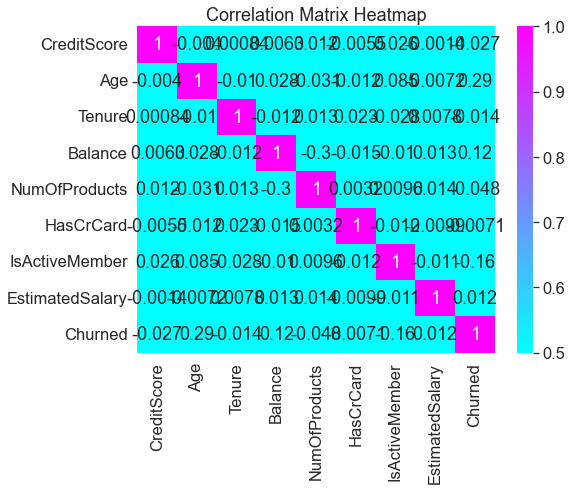

In [15]:
plt.figure(figsize=(8,6))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap="cool",vmin=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

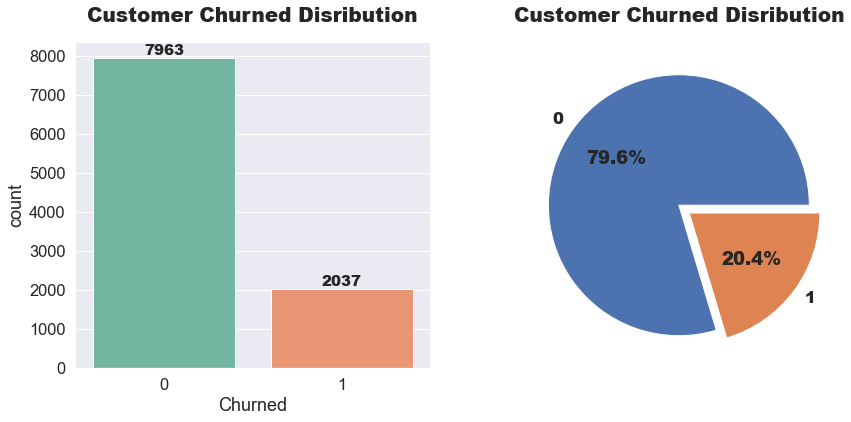

In [16]:
count = df["Churned"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

<h3 align="left"><font color=green> Inference:</font></h3>

* There is **huge class-imbalance** which can lead to **bias in model performance.**
* So to **overcome** this **class-imbalance** we have to use **over-sampling technique** from **SMOTE**.

##  Visualizing Customer Churned.

In [17]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)
        
    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

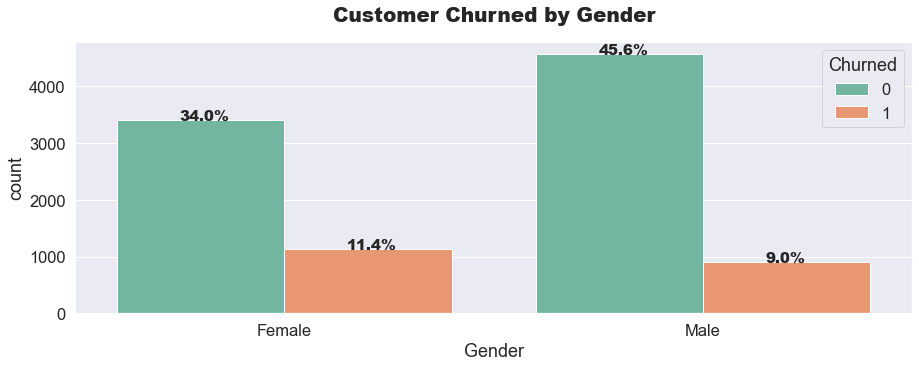

In [18]:
countplot("Gender")

<h3 align="left"><font color=green> Inference:</font></h3>

* The **churned probabillity** is more for **Feamle Customers** compared to **male customers**.
* Which means **female customers** are **more deactivating their banking facilities** compared to **male customers.**

    
<h3 align="left"><font color=green> Recommendation:</font></h3>

* Bank can **Develop targeted marketing campaigns** specifically tailored to **female customers.**
* Bank can **Focus on enhancing** the overall **customer experience** for **female customers.**

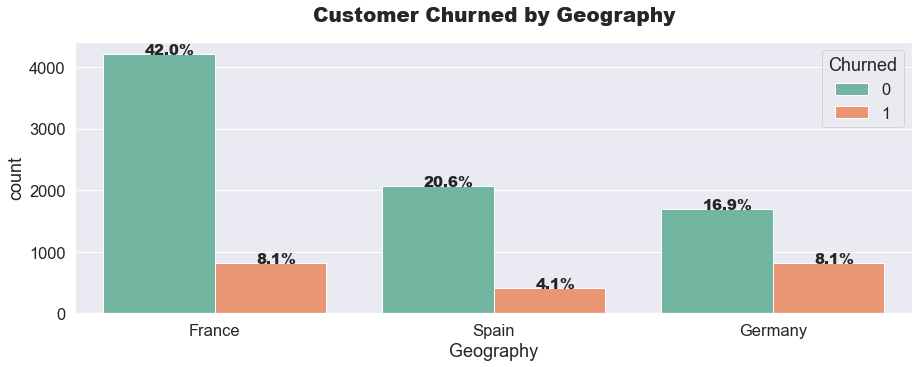

In [19]:
countplot("Geography")

<h3 align="left"><font color=green> Inference:</font></h3>

* **Half of the customers** are from **France** followed by Germany and Spain.
* Despite of the **huge total customers difference** between France & Germany the **churned rate** for **France and Germany** customers are **same.**
* There are **almost equal customers** from **Spain & Germany**, but the **Churn rate** is **almost double** in **Germany** when **compared with spain.**
    
<h3 align="left"><font color=green> Recommendation:</font></h3>
    
* Bank can **analyze** the **banking facilites & behaviour** of **customers from france** and try to **implement those on Germany customers.**

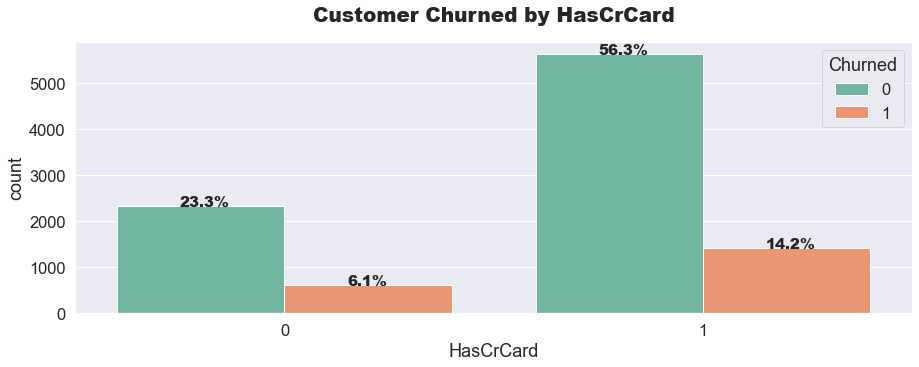

In [20]:
countplot("HasCrCard")

<h3 align="left"><font color=green> Inference:</font></h3>

* **More than 70%** of customers are having **credit card.** 
* The **churn probability value** for the **both** the categories is **almost 1:4.**
* So **credit card is not affecting the churn of customers.**

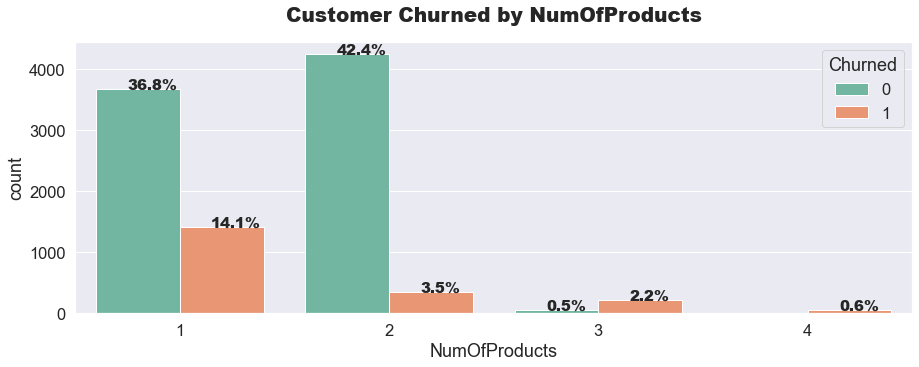

In [21]:
countplot("NumOfProducts")

<h3 align="left"><font color=green> Inference:</font></h3>

* **Most** of the customers are having **either 1 or 2** total number of banking products.
* **Very few** customers are having **more than 2** total number of banking products.
* **The lowest churn rate** is with customers having **only 2 products.** 
* There is **very high churn rate** in customers having **1 product** or **more than 2 products.**
* **Note:**
    1. We can do **feature engineering** by **grouping the customers having products more than 2 together** to **reduce the class imbalance.**
    2. Because **Class Imbalance** leads to **bias in model** and **misrepresentation of minority class.**
    

<h3 align="left"><font color=green> Recommendation:</font></h3>

* The **bank can try to convince the customers** to have **atleast 2 banking products.**
* They can provide **Rewards and Incentives** to the **customers having atleast 2 banking products.**

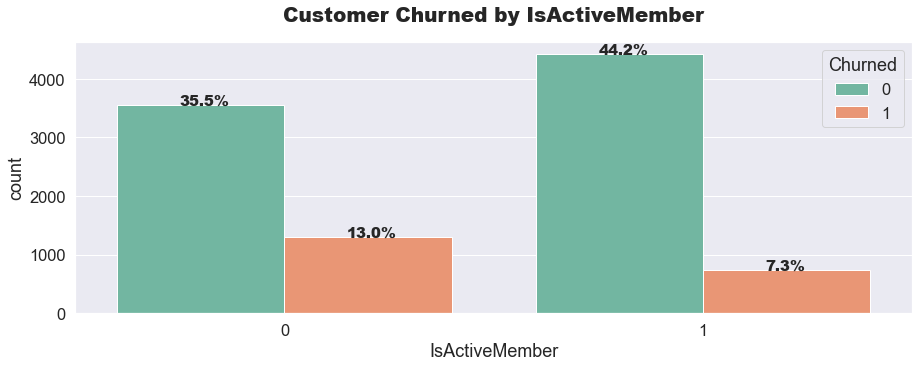

In [22]:
countplot("IsActiveMember")

<h3 align="left"><font color=green> Inference:</font></h3>

* There is **approxiamately equal customer** who are **either active or not active.**
* But the **churn rate %** in **not active customers is almost double** compared to **active customers.**
* So **customers which are not active are morely likely to deactivate their banking facilities.**

<h3 align="left"><font color=green> Recommendation:</font></h3>
    
* Bank can provide **Regular Communication and Updates**, and **Enhanced Digital Services** so that customers remain active to the banking facilities.

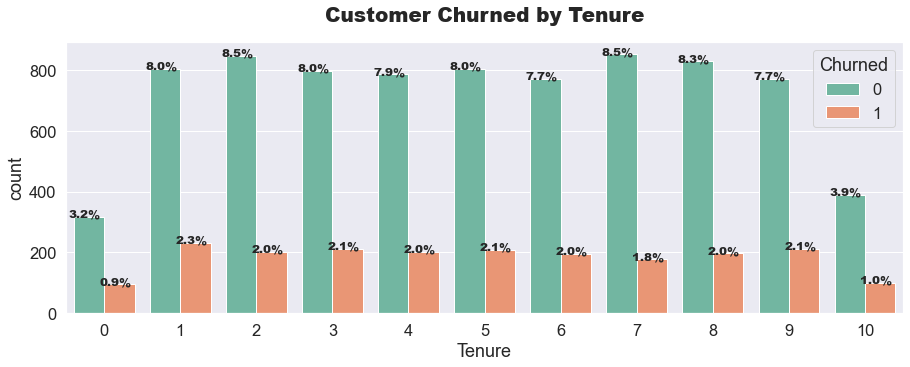

In [23]:
### Visualizing Customer Churned by "Tenure".
plt.figure(figsize=(15,5))
ax = sns.countplot(x="Tenure", data=df, hue="Churned",palette="Set2")
for value in ax.patches:
    percentage = "{:.1f}%".format(100*value.get_height()/len(df["Tenure"]))
    x = value.get_x() + value.get_width() / 2 - 0.05
    y = value.get_y() + value.get_height()
    ax.annotate(percentage, (x,y), fontweight="black",size=12, ha="center")

plt.title("Customer Churned by Tenure",fontweight="black",size=20,pad=20)
plt.show()

<h3 align="left"><font color=green> Inference:</font></h3>

* The **highest tenure is 10 years** which means that those customers have **opened their account 10 years back.**
* Since there is **almost similar distribution of churn status** we can't make any specific inference.

In [24]:
def continous_plot(column):
    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    sns.histplot(x=column,hue="Churned",data=df,kde=True,palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)

    plt.subplot(1,2,2)
    sns.boxplot(df["Churned"],df[column],palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status",fontweight="black",pad=20,size=15)
    plt.tight_layout()
    plt.show()

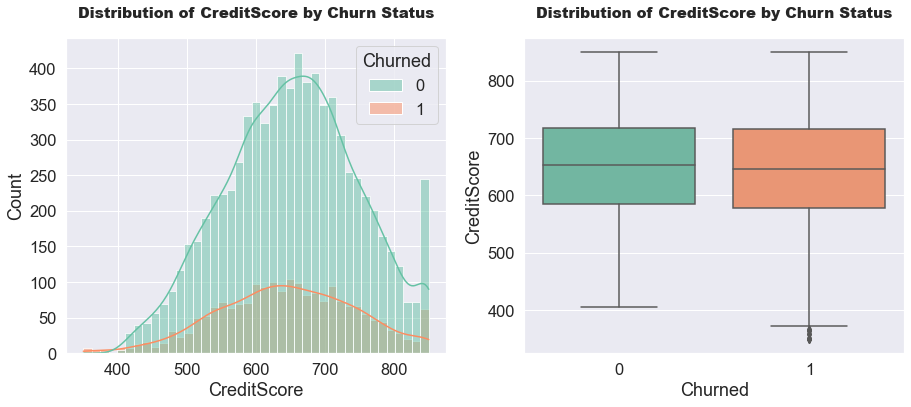

In [25]:
# Visualizing Customer Churned by "CreditScore".
continous_plot("CreditScore")

<h3 align="left"><font color=green> Inference:</font></h3>

* The **Median CreditScore** of **both churned** and **not churned** customers are **approxiamately equal.**
* Since the **values are approximately equal** for both **churn status** we can't generate any **relevant inference.**

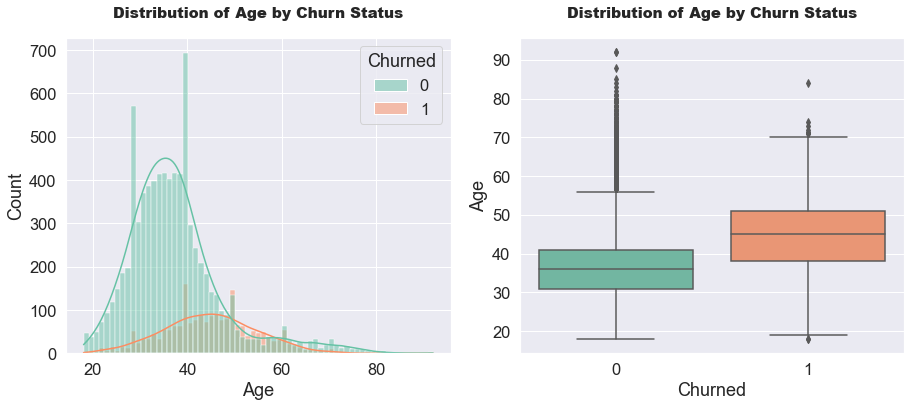

In [26]:
# Visualizing Customer Churned by "Age".
continous_plot("Age")

<h3 align="left"><font color=green> Inference:</font></h3>

* The **distribution is right skewed** because of **presence of outliers** which can lead to **overfitting in model.**
* To **overcome this right-skewed distribution** we can use **log normal transformation** technique to bring a **normal distribution.**

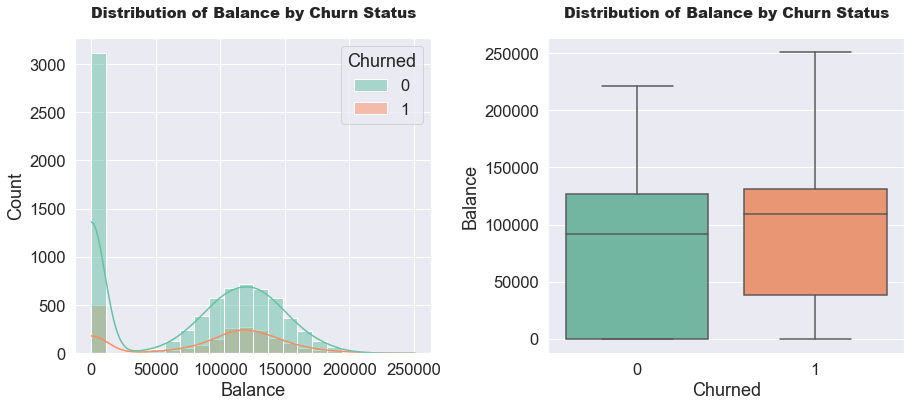

In [27]:
# Visualizing Customer Churned by "Balance."
continous_plot("Balance")

<h3 align="left"><font color=green> Inference:</font></h3>

* **More than 3000 customers** are having their **account balance equal to zero.**
* Customers with **zero balance** are more likely to **deactivate their account.**
* **Excluding the zero value** we can observe a **normal distribution.** So don't have to use any other techniques.

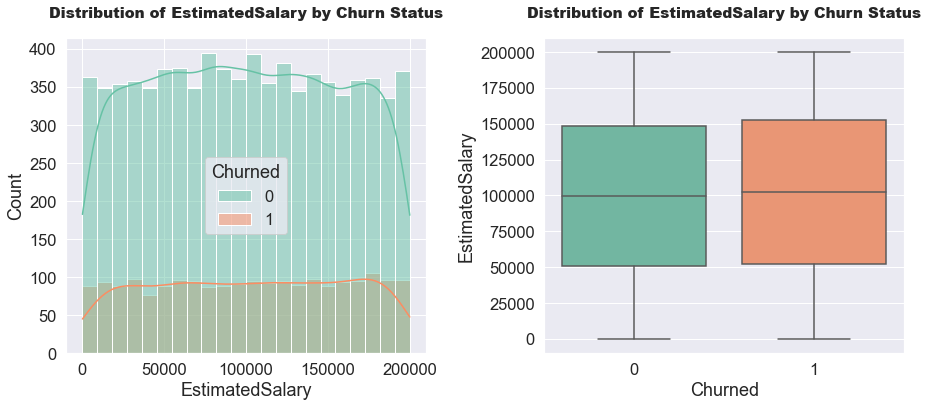

In [28]:
# Visualizing Customer Churned by "Estimated Salary".
continous_plot("EstimatedSalary")

<h3 align="left"><font color=green> Inference:</font></h3>

* The **median value of EstimatedSalary** is **approxiamately same** for both the **churned categories.**
* Since the distribution is **kind of similar** for **both churn category** we can't make any **relevant inference.**

## Creating New Feature From "NumOfProducts" Feature.

In [29]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [30]:
df["Total_Products"] = np.select(conditions,values)

In [31]:
df.drop(columns="NumOfProducts", inplace=True)

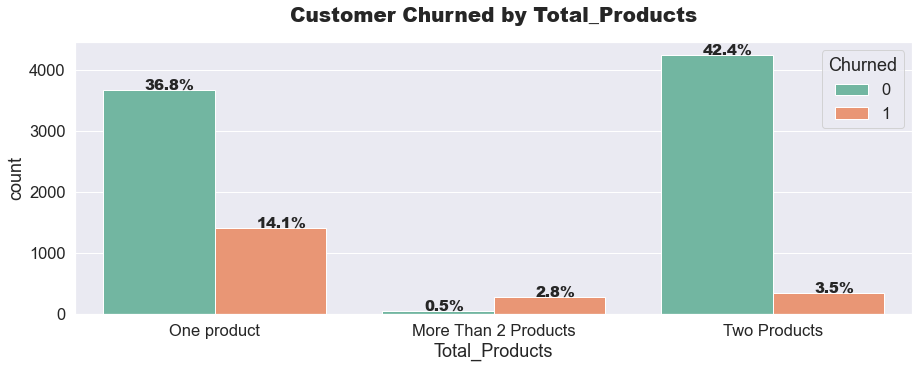

In [32]:
countplot("Total_Products")

## Creating New Feature From "Balance" Feature.

In [33]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

In [34]:
df["Account_Balance"] = np.select(conditions, values)

In [35]:
df.drop(columns="Balance",inplace=True)

## Visualizing The New Feature "Account_Balance".

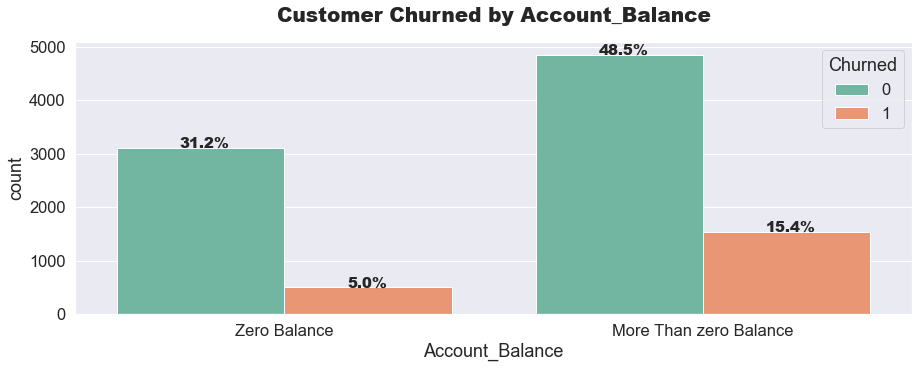

In [36]:
countplot("Account_Balance")

## Computing Unique Values of Categorical Columns.

In [37]:
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



# Performing One Hot Encoding on Categorical Features.

In [38]:
#df = pd.get_dummies(columns=cat_cols, data=df)

In [39]:
for col in cat_cols:
    one_hot = pd.get_dummies(df[col], drop_first=True)
    df = df.drop(columns=[col])
    df = df.join(one_hot)

In [40]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Germany,Spain,Male,One product,Two Products,Zero Balance
0,619,42,2,1,1,101348.88,1,0,0,0,1,0,1
1,608,41,1,0,1,112542.58,0,0,1,0,1,0,0
2,502,42,8,1,0,113931.57,1,0,0,0,0,0,0
3,699,39,1,0,0,93826.63,0,0,0,0,0,1,1
4,850,43,2,1,1,79084.10,0,0,1,0,1,0,0


## Performing Log Transformation on Age Column.

In [41]:
old_age = df["Age"]     ##Storing the previous Age values to compare these values with the transformed values.

In [42]:
df["Age"] = np.log(df["Age"])

### Visualizing Age Before and After Transformation.

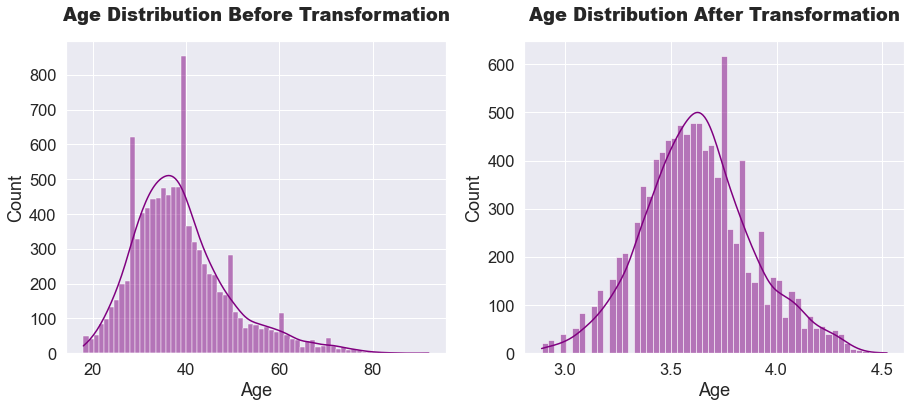

In [43]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

<h3 align="left"><font color=green> Inference:</font></h3>

    
* After applying **log normal transformation** the **age feature has achieved** a **normal distribution.**
* This will **help model** to find more **relevant patterns** and build a more **accurate model.** 

In [44]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Germany,Spain,Male,One product,Two Products,Zero Balance
0,619,3.737670,2,1,1,101348.88,1,0,0,0,1,0,1
1,608,3.713572,1,0,1,112542.58,0,0,1,0,1,0,0
2,502,3.737670,8,1,0,113931.57,1,0,0,0,0,0,0
3,699,3.663562,1,0,0,93826.63,0,0,0,0,0,1,1
4,850,3.761200,2,1,1,79084.10,0,0,1,0,1,0,0


# Segregating Features & Labels for Model Training.

In [45]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 12)
Shape of x_test is:  (2000, 12)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


<h3 align="left"><font color=green> Inference:</font></h3>

* Data is **equally splitted** for **Model Training & Testing.**
* So we can build a **Predictive Model** to find the **key factors** that are significantly influencing **customers churn.**

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Applying SMOTE to Overcome the Class-Imbalance in Target Variable.

In [49]:
smt = SMOTE(random_state=42)

x_train_resampled,y_train_resampled = smt.fit_resample(x_train,y_train)

print(x_train_resampled.shape ,y_train_resampled.shape)

(12736, 12) (12736,)


In [50]:
y_train_resampled.value_counts().to_frame()

,Churned
0,6368
1,6368


<h3 align="left"><font color=green> Inference:</font></h3>

* **Both the categories** in Target variable are now having **equal number of records.**
* So we can **train the Model** pn **balanced records** for both churn categories and make a predictive model with **low bias.**

## Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(random_state=0)
lr.fit(x_train , y_train)
y_pred_lr = lr.predict(x_test)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1595
           1       0.71      0.45      0.55       405

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



## Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train , y_train)
y_pred_dt = dt.predict(x_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1595
           1       0.51      0.54      0.53       405

    accuracy                           0.80      2000
   macro avg       0.70      0.71      0.70      2000
weighted avg       0.81      0.80      0.80      2000



## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train , y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.52      0.61       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



<h3 align="left"><font color=green> Inference:</font></h3>
    
* From the above models Random Forest gave the best accuracy  .

    

In [55]:
# Crossvalidation on RandomForest
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split': [2, 5, 10],'max_depth': [5, 6, 7], 'n_estimators':np.arange(100,600,200)}

In [56]:
GridSearch = GridSearchCV(estimator = rf, param_grid= param_grid, cv=3, n_jobs = 2 )
GridSearch.fit(x_train, y_train)
y_pred_rf = GridSearch.predict(x_test)

In [57]:
print("Best Parameters:",GridSearch.best_params_)
print("Train Score:",GridSearch.best_score_)
print("Test Score:",GridSearch.score(x_test,y_test))

Best Parameters: {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 500}
Train Score: 0.8589995736654448
Test Score: 0.8665


## Model Evaluation using Confusion Matrix.

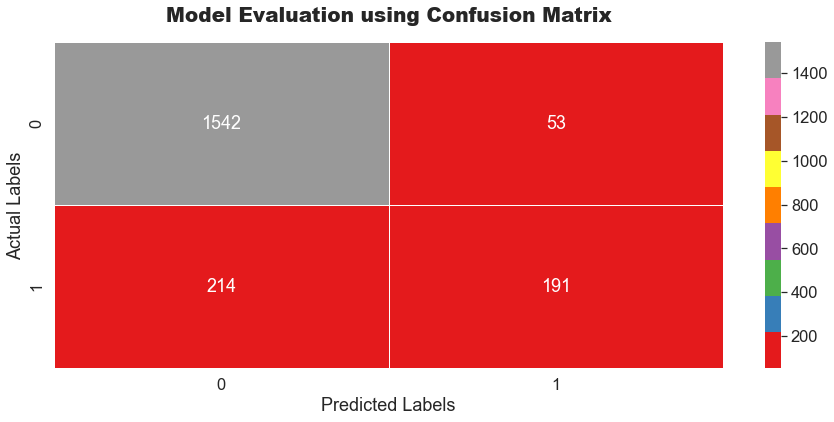

In [59]:
cm = confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

<h3 align="left"><font color=green> Inference:</font></h3>

* **Strong True Positive Rate:** The model achieved a high number of true positive predictions, indicating its ability to correctly identify positive cases. This suggests that the model is effective in accurately classifying the desired outcome.

    
* **Need of Improvement in False Negative Rate:** The presence of a relatively high number of false negatives suggests that the model may have missed identifying some actual positive cases. This indicates a need for further refinement to enhance the model's ability to capture all positive cases.

## Model Evaluation: ROC Curve and Area Under the Curve (AUC)

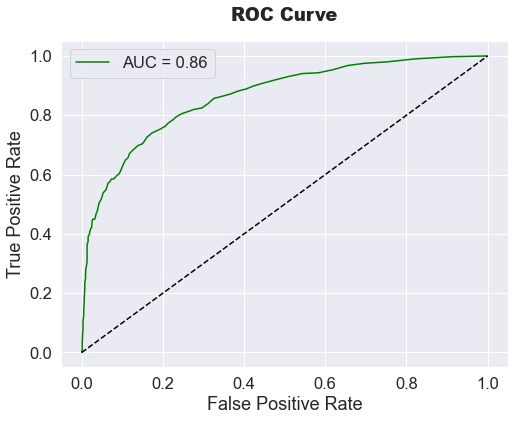

In [60]:
y_pred_proba = rf.predict_proba(x_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=["y_actual"])])
df_actual_predicted.index = y_test.index


fpr, tpr, thresholds = roc_curve(df_actual_predicted["y_actual"], y_pred_proba)
auc = roc_auc_score(df_actual_predicted["y_actual"], y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve",pad=20,fontweight="black")
plt.legend()
plt.show()

<h3 align="left"><font color=green> Inference:</font></h3>

    
1. An **AUC (Area Under the Curve) value of 0.86** suggests that the model has **strong discriminative power.** 
2. This suggests that the model has a **high ability to distinguish between positive and negative instances**, indicating its effectiveness in making accurate predictions.
3. The **model has a relatively high probability** of ranking a randomly selected positive instance higher than a randomly selected negative instance.

<h3 align="left"><font color=green> Recommendations</font></h3>

1. The **bank** can try to convince the customers to have **atleast 2 banking products** but **not less than 2.**
2. The **bank** can launch a **scheme for customers with higher ages (Senior Citizens)** so that they not deactivate their **banking facilities.**
3. The **bank** can provide **Rewards and Incentive Programs**, **Regular Communication and Updates**, and **Enhanced Digital Services** so that customers remain active to the banking facilities.